In [54]:
import pickle
import numpy as np
#import numpy.unpackbits
# Load the pickled file
with open('MoleculeEvaluation\\train.pkl\\train.pkl','rb') as file:
    data = pickle.load(file)
print(data)
#print(data.shape)
# Unpack the data
#data = data[['packed_fp','values']]#.view(np.uint8)  Packed Morgan FingerPrint
data1 = data['packed_fp']
data2  =data['values']

print(data1.shape)
print("length data1",len(data1))
print(data2.shape)
print("length data2",len(data2))
# Convert the data to numpy array if needed
#data_array = np.array(data, dtype=np.uint8)

# Unpack the array using numpy.unpackbits
unpacked_data = np.unpackbits(data1,axis = 1)

{'packed_fp': array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0, 32,  0]], dtype=uint8), 'values': tensor([[0.0000e+00],
        [0.0000e+00],
        [2.6553e-06],
        ...,
        [7.3935e-01],
        [2.4836e+00],
        [1.5122e+00]])}
(398581, 256)
length data1 398581
torch.Size([398581, 1])
length data2 398581


In [66]:
print(data1[0])
print(data1[1])
print(data1[20])

[  0   0   0   0   0   0   0   0   0   0 128   0   0   0   0   0   0   0
   0   0   0   0   0   0 128   0   0   0   0   0   0   0   0   8   0   0
   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  32   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   4   2
   0   0   0   0   0   0  64   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  32   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  16   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

In [58]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

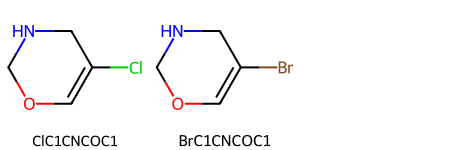

In [60]:
m1 = Chem.MolFromSmiles('ClC1=COCNC1')
m2 = Chem.MolFromSmiles('BrC1=COCNC1')
Draw.MolsToGridImage([m1, m2], subImgSize=(150, 150), legends=['ClC1CNCOC1', 'BrC1CNCOC1'])

In [64]:
#DataStructs.DiceSimilarity(data1[0], data1[1])

fp1 = AllChem.GetMorganFingerprintAsBitVect(m1, 2, nBits=1024)
fp2 = AllChem.GetMorganFingerprintAsBitVect(m2, 2, nBits=1024)
print(fp1)


AttributeError: module 'rdkit.DataStructs' has no attribute 'BitVectFromText'

In [22]:
with open('MoleculeEvaluation\\test.pkl\\test.pkl','rb') as file:
    data_test = pickle.load(file)
data1_test = data_test['packed_fp']
data2_test = data_test['values']
unpacked_data_test = np.unpackbits(data1_test,axis = 1)

In [35]:
print(data1[0])
print(len(data1[0]))

[  0   0   0   0   0   0   0   0   0   0 128   0   0   0   0   0   0   0
   0   0   0   0   0   0 128   0   0   0   0   0   0   0   0   8   0   0
   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  32   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   4   2
   0   0   0   0   0   0  64   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  32   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  16   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

In [41]:
print(unpacked_data[0])
print(len(unpacked_data[0]))# 2048 = 256 * 8 (every unpacked number is converted to 8 bit)

[0 0 0 ... 0 0 0]
2048


In [42]:
print(unpacked_data.shape)

(398581, 2048)


dataset discription: 
    
分量1：分子的表示【2048】 

分量2：对应的合成费用【1】

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import DataLoader
from torch_geometric.datasets import MoleculeNet
from torch_geometric.nn import MessagePassing, global_add_pool

# Define the Graph Neural Network model
class GNNModel(MessagePassing):
    def __init__(self, num_features, hidden_size, num_classes):
        super(GNNModel, self).__init__(aggr='add')
        self.conv1 = nn.Conv2d(num_features, hidden_size, kernel_size=1)
        self.conv2 = nn.Conv2d(hidden_size, hidden_size, kernel_size=1)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.propagate(edge_index, x=x)
        x = global_add_pool(x, batch=torch.zeros(x.size(0), dtype=torch.long))
        x = self.fc(x)
        return x

    def message(self, x_j):
        return x_j

ModuleNotFoundError: No module named 'torch_geometric'

In [ ]:

# Load the dataset (e.g., MoleculeNet)
dataset = MoleculeNet(root='/path/to/dataset', name='YOUR_DATASET_NAME', transform=None)

# Split the dataset into train and test sets
num_samples = len(dataset)
train_dataset = dataset[:int(0.8 * num_samples)]  # 80% for training
test_dataset = dataset[int(0.8 * num_samples):]  # 20% for testing

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# Instantiate the GNN model
model = GNNModel(num_features=dataset.num_features, hidden_size=64, num_classes=dataset.num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
model.train()
for epoch in range(10):
    for data in train_loader:
        optimizer.zero_grad()
        out = model(data.x, data.edge_index)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()

# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        out = model(data.x, data.edge_index)
        _, predicted = torch.max(out, 1)
        total += data.y.size(0)
        correct += (predicted == data.y).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy}')

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch_geometric.data
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv

D:\apps\anaconda3\envs\py39_torch113_cuda_117\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import torch
if torch.cuda.is_available():
    print("CUDA is available!")
else:
    print("CUDA is not available.")

CUDA is available!


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Dataset preparation

In [45]:
# Custom dataset for binary vector-like data
class BinaryVectorDataset(torch.utils.data.Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        return self.data[index]

each binary vector is converted to a PyG Data object with a single node and self-connections represented by edge_index

GNN_model

In [46]:
# Binary Vector GNN Model
class BinaryVectorGNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(BinaryVectorGNN, self).__init__()
        self.conv1 = GCNConv(input_size, hidden_size)
        self.conv2 = GCNConv(hidden_size, output_size)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x

In [47]:
model = BinaryVectorGNN(input_size=1, hidden_size=16, output_size=1) 
model

BinaryVectorGNN(
  (conv1): GCNConv(1, 16)
  (conv2): GCNConv(16, 1)
)

In [48]:
train_feature = unpacked_data
train_labels = data2
test_feature = unpacked_data_test
test_labels = data2_test

In [50]:
def custom_collate(batch):
    if isinstance(batch[0], Data):
        return batch
    else:
        return default_collate(batch)

The 1 above means we regard every binary vector as a graph

In [51]:
binary_data = unpacked_data

# Convert binary vectors to PyG Data objects
data_list = []
i = 0
for binary_vector in binary_data:
    x = torch.tensor(binary_vector, dtype=torch.float32).view(-1, 1)  # Reshape to (num_nodes, input_size)
    edge_index = torch.tensor([[0, 0]], dtype=torch.long)  # Single node with self-connection
    data = Data(x = x, edge_index = edge_index,y = data2[i])
    data_list.append(data)
    i+=1
data_list
#0 1 2
#1 2 0

# Create dataset and dataloader
dataset = BinaryVectorDataset(data_list)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True,collate_fn=custom_collate)

# Define model and optimizer
model = BinaryVectorGNN(input_size=1, hidden_size=16, output_size=1)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCEWithLogitsLoss()



# Train the model
model.train()
for epoch in range(1):
    for data in dataloader:
        optimizer.zero_grad()
        x, edge_index = data.x, data.edge_index
        output = model(x, edge_index)
        target = torch.ones(x.size(0), 1)  # Example: Target all ones
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

# Use the model for inference
model.eval()
test_input = torch.tensor([[1, 0, 1, 1, 0]], dtype=torch.float32).view(-1, 1)  # Reshape to (num_nodes, input_size)
test_edge_index = torch.tensor([[0, 0]], dtype=torch.long)
prediction = model(test_input, test_edge_index)
print(f"Prediction: {prediction.item()}")


AttributeError: 'list' object has no attribute 'x'

In [53]:
torch.save(data_list, 'data.pt')

标准的GNN中的数据格式-list of node features + list of edge feature + list of node label

探索一下，我们数据的构造原理是否可以满足图神经网络的数据构造。

In [ ]:

x = torch.tensor([[0.0, 1.0], [2.0, 3.0], [4.0, 5.0]], dtype=torch.float)  # Node features
edge_index = torch.tensor([[0, 1, 2], [1, 2, 0]], dtype=torch.long)  # Edge connectivity
y = torch.tensor([0, 1, 0], dtype=torch.long)  # Graph labels

data = Data(x=x, edge_index=edge_index, y=y)

In [ ]:
给定的数据是每一个单体/子结构的分子数据，目标是预测一个完整分子结构的合成花费。
预测时：输入还是一个[2048]的向量，

## idea1： 直接利用binary vetor作为regression

In [40]:
class BinaryVectorMLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(BinaryVectorMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        return x

In [27]:
loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [33]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class SpiralDataset(Dataset):
    def __init__(self, data_feature, data_label, path = None,transform=None, target_transform=None):# 
        #self.path = path
        self.transform = transform
        self.target_transform = transform
        self.data_feature = data_feature
        self.data_label = data_label
        
    def __len__(self):
        return len(self.data_label) # the number of samples

    def __getitem__(self, idx): # 根据给定的idx从数据集中采样，并转换为tensor格式
        feature = torch.tensor(self.data_feature[idx],dtype= torch.float)
        label = torch.tensor(self.data_label[idx],dtype= torch.float)
        if self.transform:
            feature = self.transform(feature)
        if self.target_transform:
            label = self.target_transform(label)
        return feature, label

In [34]:
def train_loop(dataloader, model, loss_fn, optimizer): # 一个epoch为单位训练
    loss_return = 0
    batch_number = 0
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        #print(X.shape)
        #print(y.shape)
        #print("batch",batch)
        
        pred = model(X)
        #print(pred.shape)
        #print(y.unsqueeze(1).shape)
        #loss = loss_fn(pred, y.unsqueeze(1))
        loss = nn.MSELoss()(pred/1000, y.unsqueeze(1)/1000)
        #print(loss)
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #print(len(X))
        loss_return+= loss.item()
        batch_number += 1 
        if batch % 2 == 0:#每两个batch输出一次loss
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
        # 该epoch以batch为单位的平均loss
        
    return loss_return/batch_number

In [35]:
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += nn.MSELoss(pred,y)#(pred/1000, y.unsqueeze(1)/1000)
            correct += (pred - y<10).type(torch.float).sum().item()
            #print(pred,'and',y)
    
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct*100,test_loss

In [36]:
train_feature = unpacked_data
train_labels = data2
test_feature = unpacked_data_test
test_labels = data2_test
print(train_feature.shape)
print(train_labels.shape)

print(test_feature.shape)
print(test_labels.shape)

(398581, 2048)
torch.Size([398581, 1])
(125240, 2048)
torch.Size([125240, 1])


In [44]:
for i in range(100,1100):
    print(train_labels[i])

tensor([0.0008])
tensor([0.])
tensor([0.])
tensor([0.0053])
tensor([0.])
tensor([0.])
tensor([0.0043])
tensor([0.])
tensor([0.])
tensor([3.0306e-07])
tensor([0.])
tensor([0.])
tensor([0.])
tensor([0.0138])
tensor([0.4100])
tensor([0.])
tensor([0.])
tensor([0.])
tensor([0.0010])
tensor([1.1986])
tensor([0.])
tensor([0.])
tensor([0.])
tensor([6.9078])
tensor([7.9543])
tensor([0.])
tensor([0.])
tensor([0.0048])
tensor([0.])
tensor([0.])
tensor([0.])
tensor([0.0005])
tensor([0.0008])
tensor([0.])
tensor([0.])
tensor([0.0010])
tensor([0.])
tensor([0.])
tensor([0.0875])
tensor([0.])
tensor([0.])
tensor([0.0010])
tensor([0.])
tensor([0.])
tensor([0.])
tensor([0.])
tensor([3.0362e-05])
tensor([3.2135])
tensor([3.2136])
tensor([0.])
tensor([0.0002])
tensor([0.])
tensor([0.])
tensor([0.])
tensor([0.])
tensor([1.1199])
tensor([4.7878])
tensor([0.])
tensor([0.])
tensor([0.0034])
tensor([0.])
tensor([0.])
tensor([6.9939e-05])
tensor([0.])
tensor([0.])
tensor([0.])
tensor([0.3363])
tensor([0.3389])


在binary之后再回归

In [41]:
model =  BinaryVectorMLP(2048,1000,1)
#model.load_state_dict(torch.load('MLP_task1.pth'))
lossGraph = []
Idx = []
testAcc = []
accGraph = []
epochs = 1
train_dataset = SpiralDataset(train_feature,train_labels)
test_dataset = SpiralDataset(test_feature,test_labels)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)
test_acc = 0.0
test_avg = 0.0
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    loss_epoch = train_loop(train_dataloader, model, loss_function, optimizer)
    test_acc,avg_loss = test_loop(test_dataloader, model, loss_function)
    lossGraph.append(loss_epoch)
    Idx.append(t)
    testAcc.append(test_acc)
    if avg_loss < 0.1:
        print('epoch trained: ',t)
        break
accGraph.append(test_acc)

print("Done!")
torch.save(model.state_dict(), 'MLP_task2.pth')

Epoch 1
-------------------------------
loss: 0.000000  [   32/398581]
loss: 0.000002  [   96/398581]
loss: 0.000001  [  160/398581]
loss: 0.000000  [  224/398581]
loss: 0.000001  [  288/398581]
loss: 0.000002  [  352/398581]
loss: 0.000002  [  416/398581]
loss: 0.000001  [  480/398581]
loss: 0.000006  [  544/398581]
loss: 0.000000  [  608/398581]
loss: 0.000001  [  672/398581]


C:\Users\chiti\AppData\Local\Temp\ipykernel_31264\1509270225.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label = torch.tensor(self.data_label[idx],dtype= torch.float)
D:\apps\anaconda3\envs\py39_torch113_cuda_117\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([32, 1, 1])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


loss: 0.000001  [  736/398581]
loss: 0.000000  [  800/398581]
loss: 0.000000  [  864/398581]
loss: 0.000004  [  928/398581]
loss: 0.000000  [  992/398581]
loss: 0.000001  [ 1056/398581]
loss: 0.000000  [ 1120/398581]
loss: 0.000002  [ 1184/398581]
loss: 0.000000  [ 1248/398581]
loss: 0.000001  [ 1312/398581]
loss: 0.000002  [ 1376/398581]
loss: 0.000003  [ 1440/398581]
loss: 0.000005  [ 1504/398581]
loss: 0.000001  [ 1568/398581]
loss: 0.000001  [ 1632/398581]
loss: 0.000002  [ 1696/398581]
loss: 0.000001  [ 1760/398581]
loss: 0.000002  [ 1824/398581]
loss: 0.000000  [ 1888/398581]
loss: 0.000002  [ 1952/398581]
loss: 0.000002  [ 2016/398581]
loss: 0.000001  [ 2080/398581]
loss: 0.000000  [ 2144/398581]
loss: 0.000002  [ 2208/398581]
loss: 0.000001  [ 2272/398581]
loss: 0.000002  [ 2336/398581]
loss: 0.000001  [ 2400/398581]
loss: 0.000000  [ 2464/398581]
loss: 0.000001  [ 2528/398581]
loss: 0.000001  [ 2592/398581]
loss: 0.000004  [ 2656/398581]
loss: 0.000000  [ 2720/398581]
loss: 0.

loss: 0.000001  [18336/398581]
loss: 0.000002  [18400/398581]
loss: 0.000001  [18464/398581]
loss: 0.000000  [18528/398581]
loss: 0.000001  [18592/398581]
loss: 0.000001  [18656/398581]
loss: 0.000001  [18720/398581]
loss: 0.000003  [18784/398581]
loss: 0.000001  [18848/398581]
loss: 0.000001  [18912/398581]
loss: 0.000003  [18976/398581]
loss: 0.000001  [19040/398581]
loss: 0.000001  [19104/398581]
loss: 0.000001  [19168/398581]
loss: 0.000001  [19232/398581]
loss: 0.000002  [19296/398581]
loss: 0.000001  [19360/398581]
loss: 0.000000  [19424/398581]
loss: 0.000001  [19488/398581]
loss: 0.000001  [19552/398581]
loss: 0.000001  [19616/398581]
loss: 0.000000  [19680/398581]
loss: 0.000000  [19744/398581]
loss: 0.000002  [19808/398581]
loss: 0.000000  [19872/398581]
loss: 0.000002  [19936/398581]
loss: 0.000000  [20000/398581]
loss: 0.000000  [20064/398581]
loss: 0.000002  [20128/398581]
loss: 0.000001  [20192/398581]
loss: 0.000004  [20256/398581]
loss: 0.000000  [20320/398581]
loss: 0.

loss: 0.000000  [35808/398581]
loss: 0.000000  [35872/398581]
loss: 0.000000  [35936/398581]
loss: 0.000001  [36000/398581]
loss: 0.000001  [36064/398581]
loss: 0.000001  [36128/398581]
loss: 0.000001  [36192/398581]
loss: 0.000001  [36256/398581]
loss: 0.000000  [36320/398581]
loss: 0.000000  [36384/398581]
loss: 0.000001  [36448/398581]
loss: 0.000001  [36512/398581]
loss: 0.000005  [36576/398581]
loss: 0.000004  [36640/398581]
loss: 0.000002  [36704/398581]
loss: 0.000001  [36768/398581]
loss: 0.000001  [36832/398581]
loss: 0.000002  [36896/398581]
loss: 0.000000  [36960/398581]
loss: 0.000001  [37024/398581]
loss: 0.000002  [37088/398581]
loss: 0.000000  [37152/398581]
loss: 0.000002  [37216/398581]
loss: 0.000001  [37280/398581]
loss: 0.000001  [37344/398581]
loss: 0.000001  [37408/398581]
loss: 0.000000  [37472/398581]
loss: 0.000000  [37536/398581]
loss: 0.000002  [37600/398581]
loss: 0.000001  [37664/398581]
loss: 0.000001  [37728/398581]
loss: 0.000001  [37792/398581]
loss: 0.

loss: 0.000001  [52960/398581]
loss: 0.000002  [53024/398581]
loss: 0.000003  [53088/398581]
loss: 0.000002  [53152/398581]
loss: 0.000001  [53216/398581]
loss: 0.000002  [53280/398581]
loss: 0.000004  [53344/398581]
loss: 0.000000  [53408/398581]
loss: 0.000000  [53472/398581]
loss: 0.000000  [53536/398581]
loss: 0.000002  [53600/398581]
loss: 0.000004  [53664/398581]
loss: 0.000001  [53728/398581]
loss: 0.000000  [53792/398581]
loss: 0.000000  [53856/398581]
loss: 0.000001  [53920/398581]
loss: 0.000002  [53984/398581]
loss: 0.000000  [54048/398581]
loss: 0.000001  [54112/398581]
loss: 0.000003  [54176/398581]
loss: 0.000001  [54240/398581]
loss: 0.000001  [54304/398581]
loss: 0.000000  [54368/398581]
loss: 0.000001  [54432/398581]
loss: 0.000005  [54496/398581]
loss: 0.000001  [54560/398581]
loss: 0.000001  [54624/398581]
loss: 0.000002  [54688/398581]
loss: 0.000000  [54752/398581]
loss: 0.000004  [54816/398581]
loss: 0.000013  [54880/398581]
loss: 0.000000  [54944/398581]
loss: 0.

loss: 0.000002  [69984/398581]
loss: 0.000001  [70048/398581]
loss: 0.000001  [70112/398581]
loss: 0.000002  [70176/398581]
loss: 0.000001  [70240/398581]
loss: 0.000001  [70304/398581]
loss: 0.000000  [70368/398581]
loss: 0.000002  [70432/398581]
loss: 0.000001  [70496/398581]
loss: 0.000001  [70560/398581]
loss: 0.000000  [70624/398581]
loss: 0.000008  [70688/398581]
loss: 0.000000  [70752/398581]
loss: 0.000044  [70816/398581]
loss: 0.000002  [70880/398581]
loss: 0.000001  [70944/398581]
loss: 0.000001  [71008/398581]
loss: 0.000001  [71072/398581]
loss: 0.000003  [71136/398581]
loss: 0.000000  [71200/398581]
loss: 0.000000  [71264/398581]
loss: 0.000004  [71328/398581]
loss: 0.000004  [71392/398581]
loss: 0.000002  [71456/398581]
loss: 0.000001  [71520/398581]
loss: 0.000000  [71584/398581]
loss: 0.000001  [71648/398581]
loss: 0.000003  [71712/398581]
loss: 0.000002  [71776/398581]
loss: 0.000000  [71840/398581]
loss: 0.000006  [71904/398581]
loss: 0.000001  [71968/398581]
loss: 0.

loss: 0.000001  [87584/398581]
loss: 0.000003  [87648/398581]
loss: 0.000010  [87712/398581]
loss: 0.000001  [87776/398581]
loss: 0.000004  [87840/398581]
loss: 0.000001  [87904/398581]
loss: 0.000000  [87968/398581]
loss: 0.000001  [88032/398581]
loss: 0.000003  [88096/398581]
loss: 0.000000  [88160/398581]
loss: 0.000003  [88224/398581]
loss: 0.000002  [88288/398581]
loss: 0.000001  [88352/398581]
loss: 0.000001  [88416/398581]
loss: 0.000002  [88480/398581]
loss: 0.000001  [88544/398581]
loss: 0.000005  [88608/398581]
loss: 0.000000  [88672/398581]
loss: 0.000037  [88736/398581]
loss: 0.000001  [88800/398581]
loss: 0.000008  [88864/398581]
loss: 0.000002  [88928/398581]
loss: 0.000001  [88992/398581]
loss: 0.000001  [89056/398581]
loss: 0.000001  [89120/398581]
loss: 0.000000  [89184/398581]
loss: 0.000000  [89248/398581]
loss: 0.000002  [89312/398581]
loss: 0.000001  [89376/398581]
loss: 0.000001  [89440/398581]
loss: 0.000002  [89504/398581]
loss: 0.000015  [89568/398581]
loss: 0.

loss: 0.000001  [104608/398581]
loss: 0.000001  [104672/398581]
loss: 0.000003  [104736/398581]
loss: 0.000001  [104800/398581]
loss: 0.000003  [104864/398581]
loss: 0.000000  [104928/398581]
loss: 0.000001  [104992/398581]
loss: 0.000002  [105056/398581]
loss: 0.000002  [105120/398581]
loss: 0.000000  [105184/398581]
loss: 0.000001  [105248/398581]
loss: 0.000001  [105312/398581]
loss: 0.000002  [105376/398581]
loss: 0.000003  [105440/398581]
loss: 0.000001  [105504/398581]
loss: 0.000001  [105568/398581]
loss: 0.000004  [105632/398581]
loss: 0.000000  [105696/398581]
loss: 0.000002  [105760/398581]
loss: 0.000000  [105824/398581]
loss: 0.000000  [105888/398581]
loss: 0.000000  [105952/398581]
loss: 0.000000  [106016/398581]
loss: 0.000001  [106080/398581]
loss: 0.000001  [106144/398581]
loss: 0.000003  [106208/398581]
loss: 0.000000  [106272/398581]
loss: 0.000000  [106336/398581]
loss: 0.000001  [106400/398581]
loss: 0.000001  [106464/398581]
loss: 0.000003  [106528/398581]
loss: 0.

loss: 0.000002  [121440/398581]
loss: 0.000001  [121504/398581]
loss: 0.000000  [121568/398581]
loss: 0.000000  [121632/398581]
loss: 0.000000  [121696/398581]
loss: 0.000001  [121760/398581]
loss: 0.000001  [121824/398581]
loss: 0.000001  [121888/398581]
loss: 0.000004  [121952/398581]
loss: 0.000000  [122016/398581]
loss: 0.000000  [122080/398581]
loss: 0.000001  [122144/398581]
loss: 0.000002  [122208/398581]
loss: 0.000003  [122272/398581]
loss: 0.000002  [122336/398581]
loss: 0.000000  [122400/398581]
loss: 0.000001  [122464/398581]
loss: 0.000001  [122528/398581]
loss: 0.000001  [122592/398581]
loss: 0.000003  [122656/398581]
loss: 0.000003  [122720/398581]
loss: 0.000000  [122784/398581]
loss: 0.000000  [122848/398581]
loss: 0.000001  [122912/398581]
loss: 0.000002  [122976/398581]
loss: 0.000001  [123040/398581]
loss: 0.000002  [123104/398581]
loss: 0.000002  [123168/398581]
loss: 0.000003  [123232/398581]
loss: 0.000015  [123296/398581]
loss: 0.000001  [123360/398581]
loss: 0.

loss: 0.000001  [138656/398581]
loss: 0.000001  [138720/398581]
loss: 0.000001  [138784/398581]
loss: 0.000001  [138848/398581]
loss: 0.000000  [138912/398581]
loss: 0.000000  [138976/398581]
loss: 0.000005  [139040/398581]
loss: 0.000002  [139104/398581]
loss: 0.000000  [139168/398581]
loss: 0.000005  [139232/398581]
loss: 0.000002  [139296/398581]
loss: 0.000002  [139360/398581]
loss: 0.000003  [139424/398581]
loss: 0.000003  [139488/398581]
loss: 0.000000  [139552/398581]
loss: 0.000008  [139616/398581]
loss: 0.000002  [139680/398581]
loss: 0.000000  [139744/398581]
loss: 0.000000  [139808/398581]
loss: 0.000002  [139872/398581]
loss: 0.000001  [139936/398581]
loss: 0.000001  [140000/398581]
loss: 0.000002  [140064/398581]
loss: 0.000000  [140128/398581]
loss: 0.000002  [140192/398581]
loss: 0.000002  [140256/398581]
loss: 0.000001  [140320/398581]
loss: 0.000000  [140384/398581]
loss: 0.000002  [140448/398581]
loss: 0.000000  [140512/398581]
loss: 0.000001  [140576/398581]
loss: 0.

loss: 0.000000  [155488/398581]
loss: 0.000000  [155552/398581]
loss: 0.000000  [155616/398581]
loss: 0.000003  [155680/398581]
loss: 0.000004  [155744/398581]
loss: 0.000001  [155808/398581]
loss: 0.000001  [155872/398581]
loss: 0.000002  [155936/398581]
loss: 0.000003  [156000/398581]
loss: 0.000002  [156064/398581]
loss: 0.000001  [156128/398581]
loss: 0.000000  [156192/398581]
loss: 0.000002  [156256/398581]
loss: 0.000001  [156320/398581]
loss: 0.000000  [156384/398581]
loss: 0.000000  [156448/398581]
loss: 0.000002  [156512/398581]
loss: 0.000003  [156576/398581]
loss: 0.000002  [156640/398581]
loss: 0.000000  [156704/398581]
loss: 0.000000  [156768/398581]
loss: 0.000001  [156832/398581]
loss: 0.000001  [156896/398581]
loss: 0.000002  [156960/398581]
loss: 0.000001  [157024/398581]
loss: 0.000000  [157088/398581]
loss: 0.000000  [157152/398581]
loss: 0.000001  [157216/398581]
loss: 0.000002  [157280/398581]
loss: 0.000001  [157344/398581]
loss: 0.000004  [157408/398581]
loss: 0.

loss: 0.000002  [172768/398581]
loss: 0.000001  [172832/398581]
loss: 0.000002  [172896/398581]
loss: 0.000000  [172960/398581]
loss: 0.000001  [173024/398581]
loss: 0.000002  [173088/398581]
loss: 0.000002  [173152/398581]
loss: 0.000001  [173216/398581]
loss: 0.000001  [173280/398581]
loss: 0.000001  [173344/398581]
loss: 0.000000  [173408/398581]
loss: 0.000002  [173472/398581]
loss: 0.000001  [173536/398581]
loss: 0.000001  [173600/398581]
loss: 0.000000  [173664/398581]
loss: 0.000017  [173728/398581]
loss: 0.000002  [173792/398581]
loss: 0.000003  [173856/398581]
loss: 0.000003  [173920/398581]
loss: 0.000001  [173984/398581]
loss: 0.000001  [174048/398581]
loss: 0.000000  [174112/398581]
loss: 0.000000  [174176/398581]
loss: 0.000000  [174240/398581]
loss: 0.000002  [174304/398581]
loss: 0.000002  [174368/398581]
loss: 0.000002  [174432/398581]
loss: 0.000002  [174496/398581]
loss: 0.000002  [174560/398581]
loss: 0.000001  [174624/398581]
loss: 0.000003  [174688/398581]
loss: 0.

loss: 0.000002  [189216/398581]
loss: 0.000001  [189280/398581]
loss: 0.000001  [189344/398581]
loss: 0.000011  [189408/398581]
loss: 0.000002  [189472/398581]
loss: 0.000002  [189536/398581]
loss: 0.000005  [189600/398581]
loss: 0.000002  [189664/398581]
loss: 0.000003  [189728/398581]
loss: 0.000001  [189792/398581]
loss: 0.000003  [189856/398581]
loss: 0.000001  [189920/398581]
loss: 0.000003  [189984/398581]
loss: 0.000000  [190048/398581]
loss: 0.000003  [190112/398581]
loss: 0.000001  [190176/398581]
loss: 0.000001  [190240/398581]
loss: 0.000002  [190304/398581]
loss: 0.000001  [190368/398581]
loss: 0.000002  [190432/398581]
loss: 0.000000  [190496/398581]
loss: 0.000001  [190560/398581]
loss: 0.000000  [190624/398581]
loss: 0.000000  [190688/398581]
loss: 0.000001  [190752/398581]
loss: 0.000001  [190816/398581]
loss: 0.000000  [190880/398581]
loss: 0.000002  [190944/398581]
loss: 0.000002  [191008/398581]
loss: 0.000002  [191072/398581]
loss: 0.000001  [191136/398581]
loss: 0.

loss: 0.000001  [206496/398581]
loss: 0.000002  [206560/398581]
loss: 0.000004  [206624/398581]
loss: 0.000001  [206688/398581]
loss: 0.000000  [206752/398581]
loss: 0.000001  [206816/398581]
loss: 0.000001  [206880/398581]
loss: 0.000001  [206944/398581]
loss: 0.000000  [207008/398581]
loss: 0.000001  [207072/398581]
loss: 0.000001  [207136/398581]
loss: 0.000006  [207200/398581]
loss: 0.000001  [207264/398581]
loss: 0.000001  [207328/398581]
loss: 0.000001  [207392/398581]
loss: 0.000002  [207456/398581]
loss: 0.000000  [207520/398581]
loss: 0.000003  [207584/398581]
loss: 0.000001  [207648/398581]
loss: 0.000001  [207712/398581]
loss: 0.000000  [207776/398581]
loss: 0.000001  [207840/398581]
loss: 0.000004  [207904/398581]
loss: 0.000004  [207968/398581]
loss: 0.000001  [208032/398581]
loss: 0.000000  [208096/398581]
loss: 0.000001  [208160/398581]
loss: 0.000003  [208224/398581]
loss: 0.000000  [208288/398581]
loss: 0.000006  [208352/398581]
loss: 0.000001  [208416/398581]
loss: 0.

loss: 0.000001  [223648/398581]
loss: 0.000001  [223712/398581]
loss: 0.000001  [223776/398581]
loss: 0.000000  [223840/398581]
loss: 0.000002  [223904/398581]
loss: 0.000001  [223968/398581]
loss: 0.000003  [224032/398581]
loss: 0.000008  [224096/398581]
loss: 0.000007  [224160/398581]
loss: 0.000001  [224224/398581]
loss: 0.000001  [224288/398581]
loss: 0.000000  [224352/398581]
loss: 0.000001  [224416/398581]
loss: 0.000001  [224480/398581]
loss: 0.000001  [224544/398581]
loss: 0.000000  [224608/398581]
loss: 0.000002  [224672/398581]
loss: 0.000001  [224736/398581]
loss: 0.000001  [224800/398581]
loss: 0.000001  [224864/398581]
loss: 0.000001  [224928/398581]
loss: 0.000000  [224992/398581]
loss: 0.000004  [225056/398581]
loss: 0.000002  [225120/398581]
loss: 0.000000  [225184/398581]
loss: 0.000012  [225248/398581]
loss: 0.000001  [225312/398581]
loss: 0.000002  [225376/398581]
loss: 0.000001  [225440/398581]
loss: 0.000002  [225504/398581]
loss: 0.000001  [225568/398581]
loss: 0.

loss: 0.000000  [240288/398581]
loss: 0.000001  [240352/398581]
loss: 0.000001  [240416/398581]
loss: 0.000001  [240480/398581]
loss: 0.000000  [240544/398581]
loss: 0.000001  [240608/398581]
loss: 0.000001  [240672/398581]
loss: 0.000006  [240736/398581]
loss: 0.000001  [240800/398581]
loss: 0.000002  [240864/398581]
loss: 0.000000  [240928/398581]
loss: 0.000001  [240992/398581]
loss: 0.000005  [241056/398581]
loss: 0.000000  [241120/398581]
loss: 0.000001  [241184/398581]
loss: 0.000004  [241248/398581]
loss: 0.000000  [241312/398581]
loss: 0.000001  [241376/398581]
loss: 0.000001  [241440/398581]
loss: 0.000000  [241504/398581]
loss: 0.000008  [241568/398581]
loss: 0.000003  [241632/398581]
loss: 0.000001  [241696/398581]
loss: 0.000002  [241760/398581]
loss: 0.000001  [241824/398581]
loss: 0.000002  [241888/398581]
loss: 0.000001  [241952/398581]
loss: 0.000009  [242016/398581]
loss: 0.000002  [242080/398581]
loss: 0.000000  [242144/398581]
loss: 0.000000  [242208/398581]
loss: 0.

loss: 0.000000  [257440/398581]
loss: 0.000003  [257504/398581]
loss: 0.000002  [257568/398581]
loss: 0.000001  [257632/398581]
loss: 0.000001  [257696/398581]
loss: 0.000003  [257760/398581]
loss: 0.000000  [257824/398581]
loss: 0.000001  [257888/398581]
loss: 0.000000  [257952/398581]
loss: 0.000000  [258016/398581]
loss: 0.000000  [258080/398581]
loss: 0.000000  [258144/398581]
loss: 0.000001  [258208/398581]
loss: 0.000001  [258272/398581]
loss: 0.000001  [258336/398581]
loss: 0.000000  [258400/398581]
loss: 0.000000  [258464/398581]
loss: 0.000002  [258528/398581]
loss: 0.000001  [258592/398581]
loss: 0.000000  [258656/398581]
loss: 0.000001  [258720/398581]
loss: 0.000002  [258784/398581]
loss: 0.000002  [258848/398581]
loss: 0.000001  [258912/398581]
loss: 0.000001  [258976/398581]
loss: 0.000001  [259040/398581]
loss: 0.000006  [259104/398581]
loss: 0.000004  [259168/398581]
loss: 0.000002  [259232/398581]
loss: 0.000002  [259296/398581]
loss: 0.000001  [259360/398581]
loss: 0.

loss: 0.000002  [274336/398581]
loss: 0.000002  [274400/398581]
loss: 0.000001  [274464/398581]
loss: 0.000004  [274528/398581]
loss: 0.000000  [274592/398581]
loss: 0.000000  [274656/398581]
loss: 0.000001  [274720/398581]
loss: 0.000000  [274784/398581]
loss: 0.000003  [274848/398581]
loss: 0.000000  [274912/398581]
loss: 0.000001  [274976/398581]
loss: 0.000001  [275040/398581]
loss: 0.000000  [275104/398581]
loss: 0.000002  [275168/398581]
loss: 0.000003  [275232/398581]
loss: 0.000001  [275296/398581]
loss: 0.000001  [275360/398581]
loss: 0.000001  [275424/398581]
loss: 0.000003  [275488/398581]
loss: 0.000003  [275552/398581]
loss: 0.000002  [275616/398581]
loss: 0.000000  [275680/398581]
loss: 0.000001  [275744/398581]
loss: 0.000002  [275808/398581]
loss: 0.000002  [275872/398581]
loss: 0.000000  [275936/398581]
loss: 0.000002  [276000/398581]
loss: 0.000001  [276064/398581]
loss: 0.000005  [276128/398581]
loss: 0.000002  [276192/398581]
loss: 0.000000  [276256/398581]
loss: 0.

loss: 0.000002  [291168/398581]
loss: 0.000002  [291232/398581]
loss: 0.000006  [291296/398581]
loss: 0.000005  [291360/398581]
loss: 0.000001  [291424/398581]
loss: 0.000001  [291488/398581]
loss: 0.000000  [291552/398581]
loss: 0.000003  [291616/398581]
loss: 0.000010  [291680/398581]
loss: 0.000006  [291744/398581]
loss: 0.000000  [291808/398581]
loss: 0.000000  [291872/398581]
loss: 0.000001  [291936/398581]
loss: 0.000001  [292000/398581]
loss: 0.000000  [292064/398581]
loss: 0.000000  [292128/398581]
loss: 0.000001  [292192/398581]
loss: 0.000003  [292256/398581]
loss: 0.000000  [292320/398581]
loss: 0.000000  [292384/398581]
loss: 0.000000  [292448/398581]
loss: 0.000001  [292512/398581]
loss: 0.000001  [292576/398581]
loss: 0.000000  [292640/398581]
loss: 0.000001  [292704/398581]
loss: 0.000002  [292768/398581]
loss: 0.000001  [292832/398581]
loss: 0.000000  [292896/398581]
loss: 0.000003  [292960/398581]
loss: 0.000002  [293024/398581]
loss: 0.000001  [293088/398581]
loss: 0.

loss: 0.000000  [307616/398581]
loss: 0.000001  [307680/398581]
loss: 0.000000  [307744/398581]
loss: 0.000001  [307808/398581]
loss: 0.000002  [307872/398581]
loss: 0.000000  [307936/398581]
loss: 0.000000  [308000/398581]
loss: 0.000001  [308064/398581]
loss: 0.000003  [308128/398581]
loss: 0.000001  [308192/398581]
loss: 0.000007  [308256/398581]
loss: 0.000000  [308320/398581]
loss: 0.000001  [308384/398581]
loss: 0.000002  [308448/398581]
loss: 0.000002  [308512/398581]
loss: 0.000009  [308576/398581]
loss: 0.000000  [308640/398581]
loss: 0.000004  [308704/398581]
loss: 0.000004  [308768/398581]
loss: 0.000000  [308832/398581]
loss: 0.000000  [308896/398581]
loss: 0.000004  [308960/398581]
loss: 0.000000  [309024/398581]
loss: 0.000002  [309088/398581]
loss: 0.000001  [309152/398581]
loss: 0.000000  [309216/398581]
loss: 0.000005  [309280/398581]
loss: 0.000000  [309344/398581]
loss: 0.000000  [309408/398581]
loss: 0.000001  [309472/398581]
loss: 0.000002  [309536/398581]
loss: 0.

loss: 0.000000  [324384/398581]
loss: 0.000002  [324448/398581]
loss: 0.000003  [324512/398581]
loss: 0.000001  [324576/398581]
loss: 0.000001  [324640/398581]
loss: 0.000001  [324704/398581]
loss: 0.000000  [324768/398581]
loss: 0.000000  [324832/398581]
loss: 0.000000  [324896/398581]
loss: 0.000005  [324960/398581]
loss: 0.000002  [325024/398581]
loss: 0.000001  [325088/398581]
loss: 0.000000  [325152/398581]
loss: 0.000002  [325216/398581]
loss: 0.000001  [325280/398581]
loss: 0.000003  [325344/398581]
loss: 0.000002  [325408/398581]
loss: 0.000000  [325472/398581]
loss: 0.000001  [325536/398581]
loss: 0.000002  [325600/398581]
loss: 0.000019  [325664/398581]
loss: 0.000003  [325728/398581]
loss: 0.000000  [325792/398581]
loss: 0.000000  [325856/398581]
loss: 0.000001  [325920/398581]
loss: 0.000001  [325984/398581]
loss: 0.000006  [326048/398581]
loss: 0.000008  [326112/398581]
loss: 0.000015  [326176/398581]
loss: 0.000003  [326240/398581]
loss: 0.000001  [326304/398581]
loss: 0.

loss: 0.000001  [341216/398581]
loss: 0.000004  [341280/398581]
loss: 0.000000  [341344/398581]
loss: 0.000004  [341408/398581]
loss: 0.000002  [341472/398581]
loss: 0.000000  [341536/398581]
loss: 0.000000  [341600/398581]
loss: 0.000000  [341664/398581]
loss: 0.000000  [341728/398581]
loss: 0.000000  [341792/398581]
loss: 0.000002  [341856/398581]
loss: 0.000000  [341920/398581]
loss: 0.000002  [341984/398581]
loss: 0.000001  [342048/398581]
loss: 0.000001  [342112/398581]
loss: 0.000002  [342176/398581]
loss: 0.000000  [342240/398581]
loss: 0.000001  [342304/398581]
loss: 0.000005  [342368/398581]
loss: 0.000001  [342432/398581]
loss: 0.000000  [342496/398581]
loss: 0.000003  [342560/398581]
loss: 0.000000  [342624/398581]
loss: 0.000003  [342688/398581]
loss: 0.000001  [342752/398581]
loss: 0.000003  [342816/398581]
loss: 0.000000  [342880/398581]
loss: 0.000001  [342944/398581]
loss: 0.000000  [343008/398581]
loss: 0.000001  [343072/398581]
loss: 0.000000  [343136/398581]
loss: 0.

loss: 0.000001  [357856/398581]
loss: 0.000005  [357920/398581]
loss: 0.000001  [357984/398581]
loss: 0.000000  [358048/398581]
loss: 0.000018  [358112/398581]
loss: 0.000001  [358176/398581]
loss: 0.000001  [358240/398581]
loss: 0.000019  [358304/398581]
loss: 0.000002  [358368/398581]
loss: 0.000002  [358432/398581]
loss: 0.000003  [358496/398581]
loss: 0.000002  [358560/398581]
loss: 0.000001  [358624/398581]
loss: 0.000002  [358688/398581]
loss: 0.000002  [358752/398581]
loss: 0.000001  [358816/398581]
loss: 0.000000  [358880/398581]
loss: 0.000004  [358944/398581]
loss: 0.000002  [359008/398581]
loss: 0.000001  [359072/398581]
loss: 0.000004  [359136/398581]
loss: 0.000001  [359200/398581]
loss: 0.000001  [359264/398581]
loss: 0.000001  [359328/398581]
loss: 0.000001  [359392/398581]
loss: 0.000003  [359456/398581]
loss: 0.000004  [359520/398581]
loss: 0.000001  [359584/398581]
loss: 0.000002  [359648/398581]
loss: 0.000001  [359712/398581]
loss: 0.000001  [359776/398581]
loss: 0.

loss: 0.000001  [374688/398581]
loss: 0.000001  [374752/398581]
loss: 0.000001  [374816/398581]
loss: 0.000001  [374880/398581]
loss: 0.000001  [374944/398581]
loss: 0.000001  [375008/398581]
loss: 0.000002  [375072/398581]
loss: 0.000000  [375136/398581]
loss: 0.000001  [375200/398581]
loss: 0.000001  [375264/398581]
loss: 0.000000  [375328/398581]
loss: 0.000001  [375392/398581]
loss: 0.000001  [375456/398581]
loss: 0.000000  [375520/398581]
loss: 0.000002  [375584/398581]
loss: 0.000002  [375648/398581]
loss: 0.000001  [375712/398581]
loss: 0.000001  [375776/398581]
loss: 0.000004  [375840/398581]
loss: 0.000000  [375904/398581]
loss: 0.000000  [375968/398581]
loss: 0.000057  [376032/398581]
loss: 0.000000  [376096/398581]
loss: 0.000002  [376160/398581]
loss: 0.000001  [376224/398581]
loss: 0.000006  [376288/398581]
loss: 0.000002  [376352/398581]
loss: 0.000001  [376416/398581]
loss: 0.000000  [376480/398581]
loss: 0.000000  [376544/398581]
loss: 0.000003  [376608/398581]
loss: 0.

loss: 0.000008  [391456/398581]
loss: 0.000001  [391520/398581]
loss: 0.000001  [391584/398581]
loss: 0.000002  [391648/398581]
loss: 0.000001  [391712/398581]
loss: 0.000000  [391776/398581]
loss: 0.000000  [391840/398581]
loss: 0.000000  [391904/398581]
loss: 0.000000  [391968/398581]
loss: 0.000001  [392032/398581]
loss: 0.000011  [392096/398581]
loss: 0.000000  [392160/398581]
loss: 0.000000  [392224/398581]
loss: 0.000000  [392288/398581]
loss: 0.000000  [392352/398581]
loss: 0.000000  [392416/398581]
loss: 0.000002  [392480/398581]
loss: 0.000001  [392544/398581]
loss: 0.000002  [392608/398581]
loss: 0.000001  [392672/398581]
loss: 0.000000  [392736/398581]
loss: 0.000001  [392800/398581]
loss: 0.000003  [392864/398581]
loss: 0.000001  [392928/398581]
loss: 0.000000  [392992/398581]
loss: 0.000001  [393056/398581]
loss: 0.000000  [393120/398581]
loss: 0.000002  [393184/398581]
loss: 0.000002  [393248/398581]
loss: 0.000015  [393312/398581]
loss: 0.000000  [393376/398581]
loss: 0.

D:\apps\anaconda3\envs\py39_torch113_cuda_117\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([21, 1, 1])) that is different to the input size (torch.Size([21, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: Boolean value of Tensor with more than one value is ambiguous

因为binary稀疏且没有利用位置结构信息，loss极小，分类/回归预测效果很差。

给定的fingerprint只能通过获得相似度信息
合成分子的-基于距离的分子相似度


In [91]:
#similar_matrix = np.zeros((len(train_feature),len(train_feature)))

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
def cos_sim(v1,v2):
    return cosine_similarity(v1.reshape(1, -1), v2.reshape(1, -1))

# Example binary vectors
v1 = train_feature[0]
v2 = train_feature[1]
v3 = train_feature[2]
v4 = train_feature[3]
v5 = train_feature[4]
v6 = train_feature[5]
# Calculate cosine similarity
similarity = cos_sim(v1,v2)
for j in range(20,100):
    if train_labels[j][0]==0:
        continue
    weight_value = 0
    for i in range(1,6):
        sim = cos_sim(train_feature[j],train_feature[i])
        weight_value += sim[0][0] * train_labels[i]
        #print(sim[0][0]," and ",train_labels[i][0]," and ",weight_value[0])
    print(weight_value[0])
    print("ground truth: ",train_labels[j][0],'\n')  # Output: [[0.]]

tensor(0.0212)
ground truth:  tensor(0.0002) 

tensor(0.0175)
ground truth:  tensor(3.4421e-07) 

tensor(0.0611)
ground truth:  tensor(4.9111e-05) 

tensor(0.0433)
ground truth:  tensor(0.3540) 

tensor(0.0462)
ground truth:  tensor(0.0013) 

tensor(0.0508)
ground truth:  tensor(2.2982) 

tensor(0.0268)
ground truth:  tensor(0.0014) 

tensor(0.0372)
ground truth:  tensor(0.0350) 

tensor(0.0368)
ground truth:  tensor(0.0011) 

tensor(0.0583)
ground truth:  tensor(0.6943) 

tensor(0.0462)
ground truth:  tensor(0.0626) 

tensor(0.0489)
ground truth:  tensor(0.0022) 

tensor(0.0350)
ground truth:  tensor(0.0641) 

tensor(0.0343)
ground truth:  tensor(0.0792) 

tensor(0.0543)
ground truth:  tensor(0.0149) 

tensor(0.0540)
ground truth:  tensor(1.9989e-05) 

tensor(0.0411)
ground truth:  tensor(0.7061) 

tensor(0.0308)
ground truth:  tensor(0.0628) 

tensor(0.0506)
ground truth:  tensor(0.0044) 

tensor(0.0350)
ground truth:  tensor(0.0173) 

tensor(0.0514)
ground truth:  tensor(0.0366) 

t

In [92]:
import numpy as np
from rdkit import Chem

# Example fingerprint (binary vector)
fingerprint = np.array([1, 0, 1, 0, 0, 1])

# Decode the fingerprint to obtain the molecular graph
mol = Chem.RDKFingerprintToMol(fingerprint)

# Get the edge relationships (connectivity) between atoms
edge_index = []
for bond in mol.GetBonds():
    src = bond.GetBeginAtomIdx()
    dst = bond.GetEndAtomIdx()
    edge_index.append([src, dst])

# Convert the edge_index to a NumPy array
edge_index = np.array(edge_index).T

# Print the edge relationships
print(edge_index)

AttributeError: module 'rdkit.Chem' has no attribute 'RDKFingerprintToMol'